# LEAKY INTEGRATE AND FIRE MODEL AND ITS BEHAVIOUR

In [1]:
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.leaky_integrate_and_fire import LIF 
from neurodynex.tools import input_factory, plot_tools
from scipy.signal import find_peaks 
from scipy.stats import mode

A helper function to determine the amplitude of the signal.(got online)

In [2]:
def find_sinusoid_amplitude(sinusoid_signal):
    positive_peaks_loc = find_peaks(sinusoid_signal)
    positive_peaks_val = sinusoid_signal[positive_peaks_loc[0]]

    negative_peaks_loc = find_peaks(-sinusoid_signal)
    negative_peaks_val = sinusoid_signal[negative_peaks_loc[0]]
    
    # remove positive peak without a negative peak pair 
    positive_peaks_val = positive_peaks_val[:len(negative_peaks_val)]

    amplitude = positive_peaks_val - negative_peaks_val
    amplitude_mode = mode(np.round(amplitude, 5))
    return amplitude_mode[0][0]

WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 is required. Get it with "Build Tools for Visual Studio": https://visualstudio.microsoft.com/downloads/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


nr of spikes: 0


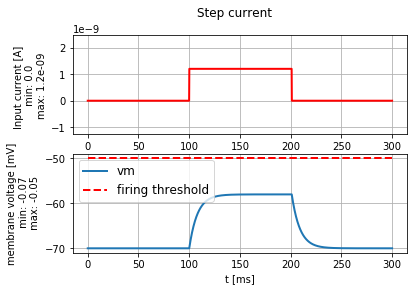

nr of spikes: 5


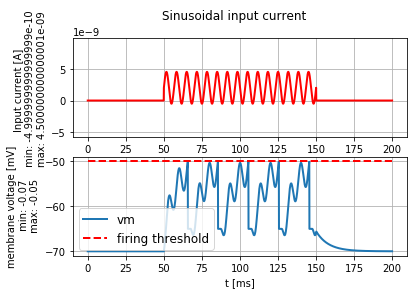

Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002


In [3]:
LIF.getting_started()
LIF.print_default_parameters()

# Exercise: minimal current

In the absence of an input current, a LIF neuron has a constant membrane voltage vm=v_rest. If an input current drives vm above the firing threshold, a spike is generated. Then, vm is reset to v_reset and the neuron ignores any input during the refractroy period.

Question 2.1.1

Question: minimal current (calculation)

For the default neuron parameters (see above) compute the minimal amplitude i_min of a step current to elicitate a spike.

In [4]:
print("resting potential of the neuron is: {}".format(LIF.V_REST))

resting potential of the neuron is: -0.07


In [5]:
print('Firing threshold of the neuron is : {}'.format(LIF.FIRING_THRESHOLD))

Firing threshold of the neuron is : -0.05


In [6]:
print('Membrane resistance of the neuron is : {}'.format(LIF.MEMBRANE_RESISTANCE))

Membrane resistance of the neuron is : 10000000.0


In [7]:
resting_ptnl=LIF.V_REST
firing_ptnl=LIF.FIRING_THRESHOLD
membrane_resistance=LIF.MEMBRANE_RESISTANCE

As time reaches infinity u(t)=u(rest)+Resistance*I_min)
I_min=u(t)-u(rest)/Resistance

In [8]:
#potential differnce delta_u
delta_u=firing_ptnl-resting_ptnl
I_min=(delta_u)/membrane_resistance
print("Minimum current(Imin) amplitude of step current to elicitate a spike (in nanoAmperes) is : ",I_min)

Minimum current(Imin) amplitude of step current to elicitate a spike (in nanoAmperes) is :  2. nA


Use the value i_min you’ve computed and verify your result: inject a step current of amplitude i_min for 100ms into the LIF neuron and plot the membrane voltage. Vm should approach the firing threshold but not fire.

The minimum current we calculated was 2 nanoAmperes

Question 2.1.2 Minimum current simulation

nr of spikes: 0


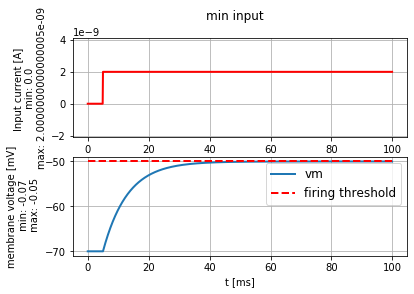

In [9]:
# create a step current with amplitude= I_min
step_current = input_factory.get_step_current(t_start=5, t_end=100, unit_time=b2.ms,amplitude= I_min)  # set i_min to your value
# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 100 * b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

# Exercise: f-I Curve
#  Question 2.2.1 f-I Curve and refractoryness

Sketch the f-I curve you expect to see
What is the maximum rate at which this neuron can fire?
Inject currents of different amplitudes (from 0nA to 100nA) into a LIF neuron. For each current, run the simulation for 500ms and determine the firing frequency in Hz. Then plot the f-I curve. Pay attention to the low input current.

In [88]:
LIF.simulate_LIF_neuron

<function neurodynex.leaky_integrate_and_fire.LIF.simulate_LIF_neuron(input_current, simulation_time=5. * msecond, v_rest=-70. * mvolt, v_reset=-65. * mvolt, firing_threshold=-50. * mvolt, membrane_resistance=10. * Mohm, membrane_time_scale=8. * msecond, abs_refractory_period=2. * msecond)>

In [11]:
current_list=[I_min/10,I_min/5,I_min/2,I_min,I_min,I_min*2,I_min*3,I_min*4,I_min*5,I_min*6]
curr_arr=range(0,105)
curr_arr=[x * b2.namp for x in curr_arr]
firing_frequency=[]
refractory_period=3*b2.ms
i=0
for current in curr_arr:
    step_current=input_factory.get_step_current(t_start=5,t_end=495,unit_time=b2.ms,amplitude=current)
    (state, spike) = LIF.simulate_LIF_neuron(input_current=step_current,simulation_time=500 * b2.ms,abs_refractory_period = refractory_period)
    spike_count = spike.count[0]
    firing_frequency.append(spike_count/(495 * 10**-3))
    print("current: ",current, "  spike_count : ",spike_count)
    print("----------------------------------------------------------")

current:  0. A   spike_count :  0
----------------------------------------------------------
current:  1. nA   spike_count :  0
----------------------------------------------------------
current:  2. nA   spike_count :  0
----------------------------------------------------------
current:  3. nA   spike_count :  47
----------------------------------------------------------
current:  4. nA   spike_count :  66
----------------------------------------------------------
current:  5. nA   spike_count :  79
----------------------------------------------------------
current:  6. nA   spike_count :  89
----------------------------------------------------------
current:  7. nA   spike_count :  98
----------------------------------------------------------
current:  8. nA   spike_count :  104
----------------------------------------------------------
current:  9. nA   spike_count :  109
----------------------------------------------------------
current:  10. nA   spike_count :  114
--------------

current:  85. nA   spike_count :  159
----------------------------------------------------------
current:  86. nA   spike_count :  159
----------------------------------------------------------
current:  87. nA   spike_count :  159
----------------------------------------------------------
current:  88. nA   spike_count :  159
----------------------------------------------------------
current:  89. nA   spike_count :  159
----------------------------------------------------------
current:  90. nA   spike_count :  159
----------------------------------------------------------
current:  91. nA   spike_count :  159
----------------------------------------------------------
current:  92. nA   spike_count :  159
----------------------------------------------------------
current:  93. nA   spike_count :  159
----------------------------------------------------------
current:  94. nA   spike_count :  159
----------------------------------------------------------
current:  95. nA   spike_count

We see that the number of spikes at 3nA is 47 and increases with increase in current.We plot for different values from 0 - 100 nA below.

Number of spikes is :  13


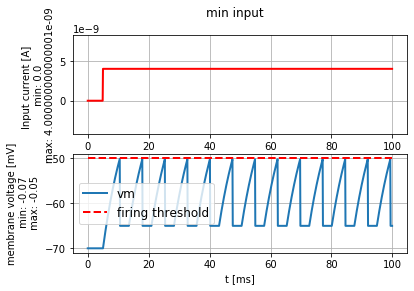

In [12]:
step_current = input_factory.get_step_current(t_start=5, t_end=100, unit_time=b2.ms,amplitude=2*I_min)  # set i_min to your value
(state_monitor,spike_monitor)=LIF.simulate_LIF_neuron(
    input_current=step_current,
    simulation_time = 100 * b2.ms,
    abs_refractory_period=3*b2.ms)
plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="min input", 
                                           firing_threshold=LIF.FIRING_THRESHOLD)
print("Number of spikes is : ",spike_monitor.count[0])

In [13]:
current_list2=np.arange(0,100,3)
firing_frequency=[]
refractory_period=3*b2.ms
i=0
for current in current_list2:
    step_current=input_factory.get_step_current(t_start=5,t_end=495,unit_time=b2.ms,amplitude=current*b2.nA)
    (state, spike) = LIF.simulate_LIF_neuron(input_current=step_current,simulation_time=500 * b2.ms,abs_refractory_period = refractory_period)
    spike_count = spike.count[0]
    firing_frequency.append(spike_count/(495 * 10**-3))
    print("current: ",current, "  spike_count : ",spike_count)
    print("----------------------------------------------------------")

current:  0   spike_count :  0
----------------------------------------------------------
current:  3   spike_count :  47
----------------------------------------------------------
current:  6   spike_count :  89
----------------------------------------------------------
current:  9   spike_count :  109
----------------------------------------------------------
current:  12   spike_count :  120
----------------------------------------------------------
current:  15   spike_count :  129
----------------------------------------------------------
current:  18   spike_count :  133
----------------------------------------------------------
current:  21   spike_count :  137
----------------------------------------------------------
current:  24   spike_count :  141
----------------------------------------------------------
current:  27   spike_count :  145
----------------------------------------------------------
current:  30   spike_count :  145
--------------------------------------------

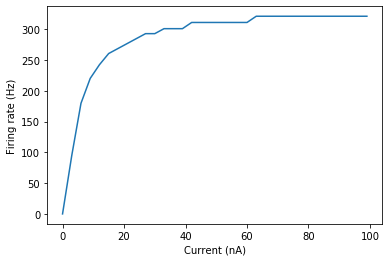

In [14]:
plt.figure()
plt.plot(current_list2, firing_frequency)
plt.xlabel('Current (nA)')
plt.ylabel('Firing rate (Hz)')
plt.show()

The firing frequency of the neuron is inversely proportional to the refractory period.
i.e. 1/(refractory period) is the firing frequency.
Here given refractory period is 3ms --> so the firing frequency is (1/0.003)=333.33 Hertz

A LIF neuron is determined by the following parameters: Resting potential, Reset voltage, Firing threshold, Membrane resistance, Membrane time-scale, Absolute refractory period. By injecting a known test current into a LIF neuron (with unknown parameters), we can determine the neuron properties from the voltage response.

# 2.3 Exercise: “Experimentally” estimate the parameters of a LIF neuron

A LIF neuron is determined by the following parameters: Resting potential, Reset voltage, Firing threshold, Membrane resistance, Membrane time-scale, Absolute refractory period. By injecting a known test current into a LIF neuron (with unknown parameters), you can determine the neuron properties from the voltage response.

 2.3.1 Question: “Read” the LIF parameters out of the vm plot

1.Get a random parameter set

In [15]:
rand_param=LIF.get_random_param_set(432)
print(type(rand_param))

<class 'list'>


In [16]:
(rand_param)

[-32.58 * volt,
 -42.296 * volt,
 -148.912 * volt,
 5.256 * Gohm,
 48.696 * second,
 0.422 * second]

2.Create an input current of your choice

In [17]:
test_current = input_factory.get_step_current(t_start=5, t_end=50, unit_time=b2.ms, amplitude= 100 * b2.namp)

3.Simulate the LIF neuron using the random parameters and your test-current. Note that the simulation runs for a fixed duration of 50ms.

In [18]:
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, rand_param)

4.Plot the membrane voltage and estimate the parameters. You do not have to write code to analyse the voltage data in the StateMonitor. Simply estimate the values from the plot. For the Membrane resistance and the Membrane time-scale you might have to change your current.

(<matplotlib.axes._subplots.AxesSubplot at 0x26beba79dc8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x26beb9f0648>)

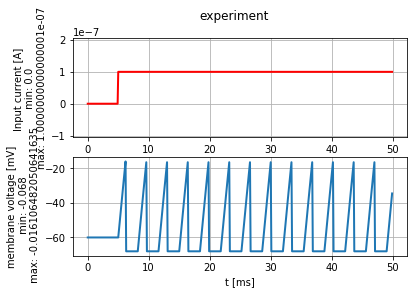

In [19]:
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="experiment")

5.compare your estimates with the true values.

In [20]:
print('Original default parameters')
LIF.print_default_parameters()

Original default parameters
Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002


In [21]:
LIF.print_obfuscated_parameters(rand_param)

Resting potential: -0.06
Reset voltage: -0.068
Firing threshold: -0.016
Membrane resistance: 9000000.0
Membrane time-scale: 0.024
Absolute refractory period: 0.002


membrane resistance=u(t)-u(rest)/input_current

# 2.4 Exercise: Sinusoidal input current and subthreshold response

In the subthreshold regime (no spike), the LIF neuron is a linear system and the membrane voltage is a filtered version of the input current. In this exercise we study the properties of this linear system when it gets a sinusoidal stimulus.

2.4.1 Create a sinusoidal input current (see example below) and inject it into the LIF neuron. Determine the phase and amplitude of the membrane voltage.

In [178]:
# note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=250*b2.Hz,
                                            direct_current=0. * b2.namp)

In [179]:
# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)

nr of spikes: 0


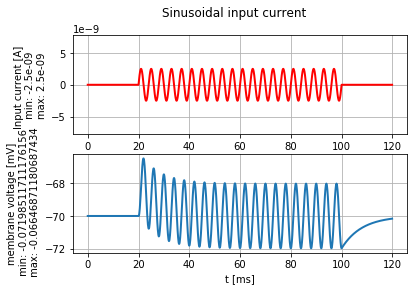

In [180]:
# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
print("nr of spikes: {}".format(spike_monitor.count[0]))

The amplitude ranges from (-70 to -66) so the amplitude is about 4

In [184]:
print("The actual amplitude in mV is",find_sinusoid_amplitude(state_monitor.v[0]*1000))

The actual amplitude in mV is 3.97044


Lets zoom in a little  bit to see the phase gap more clearly We do this by changing the frequency.

In [168]:
# note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=25*b2.Hz,
                                            direct_current=0. * b2.namp)

In [169]:
# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)

In [175]:
print(type(state_monitor.v[0]))

<class 'brian2.units.fundamentalunits.Quantity'>


nr of spikes: 0


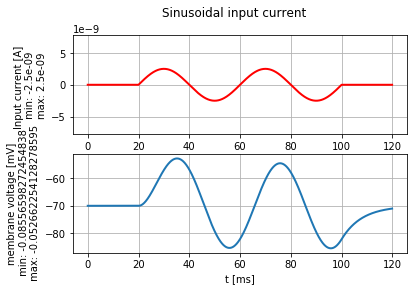

In [161]:
# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
print("nr of spikes: {}".format(spike_monitor.count[0]))

So,one wave's time period in first wave is 40

Time period of second wave is about 44-45

The average(estimated) phase shift can roughly be estimated to be ((45-40)+(44-40))/2 ~ 4.5

So the phase shift comes to be around 4.5-5

2.4.2 For input frequencies between 10Hz and 1kHz, plot the the resulting amplitude of subthreshold oscillations of the membrane potential vs. input frequency.

In [23]:
frequency_list=np.arange(10,1000,25)
membrane_voltage=[]
for frequency in frequency_list:
    sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,amplitude= 3.0 * b2.namp, frequency=frequency*b2.Hz,direct_current=0. * b2.namp)
    (state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 200 * b2.ms, firing_threshold=0*b2.mV)
    membrane_voltage.append(find_sinusoid_amplitude(state_monitor.v[0]))    

In [28]:
print(membrane_voltage)

[0.05353, 0.02589, 0.01518, 0.01368, 0.01068, 0.00875, 0.00741, 0.00642, 0.00566, 0.00506, 0.00458, 0.00418, 0.00385, 0.00356, 0.00332, 0.0031, 0.00291, 0.00274, 0.0026, 0.00246, 0.00235, 0.00223, 0.00214, 0.00204, 0.00196, 0.00189, 0.00181, 0.00175, 0.00169, 0.00163, 0.00157, 0.00152, 0.00149, 0.00145, 0.0014, 0.00134, 0.00131, 0.00127, 0.00126, 0.00123]


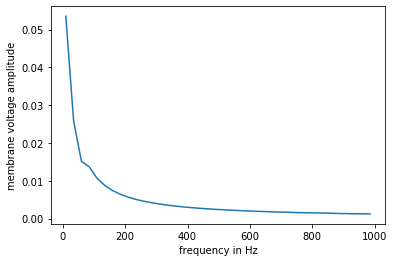

In [27]:
plt.plot(frequency_list,membrane_voltage)
plt.xlabel('frequency in Hz')
plt.ylabel('membrane voltage amplitude')
plt.show()

2.4.4 To what type of filter (High-Pass, Low-Pass) does this correspond?